# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | el bauga
Processing Record 6 of Set 1 | bayanhongor
Processing Record 7 of Set 1 | errachidia
Processing Record 8 of Set 1 | gorakhpur
Processing Record 9 of Set 1 | pori
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | khandyga
Processing Record 14 of Set 1 | wajir
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | matale
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | sheoganj
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | mabaruma
Processing Record 21 of Set 1 | rikaze
Processing Record 22 of Set 1 | al qusayr
Processing Recor

Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 43 of Set 4 | bontang
Processing Record 44 of Set 4 | hadibu
Processing Record 45 of Set 4 | alvorada
Processing Record 46 of Set 4 | nuriootpa
Processing Record 47 of Set 4 | bikenibeu village
Processing Record 48 of Set 4 | namibe
Processing Record 49 of Set 4 | lazaro cardenas
Processing Record 0 of Set 5 | tsentoroy
Processing Record 1 of Set 5 | hampton
Processing Record 2 of Set 5 | biograd na moru
Processing Record 3 of Set 5 | burumburum
Processing Record 4 of Set 5 | new norfolk
Processing Record 5 of Set 5 | independence
Processing Record 6 of Set 5 | behbahan
Processing Record 7 of Set 5 | taltal
Processing Record 8 of Set 5 | mariental
Processing Record 9 of Set 5 | cooper's town
Processing Record 10 of Set 5 | miyazu
Processing Record 11 of Set 5 | bakchar
Processing Record 12 of Set 5 | semirom
Processing Record 13 of Set 5 | holualoa
Processing Re

Processing Record 33 of Set 8 | ambodifotatra
Processing Record 34 of Set 8 | robore
Processing Record 35 of Set 8 | yagry
City not found. Skipping...
Processing Record 36 of Set 8 | puerto ayacucho
Processing Record 37 of Set 8 | wetaskiwin
Processing Record 38 of Set 8 | ahau
City not found. Skipping...
Processing Record 39 of Set 8 | aykhal
Processing Record 40 of Set 8 | bowen
Processing Record 41 of Set 8 | papao
Processing Record 42 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 43 of Set 8 | saint-joseph
Processing Record 44 of Set 8 | santana
Processing Record 45 of Set 8 | achacachi
Processing Record 46 of Set 8 | galesong
Processing Record 47 of Set 8 | muswellbrook
Processing Record 48 of Set 8 | sant lluis
Processing Record 49 of Set 8 | luau
Processing Record 0 of Set 9 | jining
Processing Record 1 of Set 9 | saint-louis
Processing Record 2 of Set 9 | kununurra
Processing Record 3 of Set 9 | road town
Processing Record 4 of Set 9 | ayr
Processing Recor

Processing Record 21 of Set 12 | mountain home
Processing Record 22 of Set 12 | babu
Processing Record 23 of Set 12 | red deer
Processing Record 24 of Set 12 | sosnovo-ozerskoye
Processing Record 25 of Set 12 | kegeyli shahar
Processing Record 26 of Set 12 | ghat
Processing Record 27 of Set 12 | la passe
Processing Record 28 of Set 12 | lata
Processing Record 29 of Set 12 | fada
Processing Record 30 of Set 12 | tchollire
Processing Record 31 of Set 12 | rodna
Processing Record 32 of Set 12 | usogorsk
Processing Record 33 of Set 12 | carutapera
Processing Record 34 of Set 12 | nova olimpia
Processing Record 35 of Set 12 | laguna
Processing Record 36 of Set 12 | monrovia
Processing Record 37 of Set 12 | ardestan
Processing Record 38 of Set 12 | sofifi
City not found. Skipping...
Processing Record 39 of Set 12 | san andres
Processing Record 40 of Set 12 | reggane
Processing Record 41 of Set 12 | novyy turtkul'
Processing Record 42 of Set 12 | yuxi
-----------------------------
Data Retrie

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
#function to convert the max temperature from kelvin to celsius
def celsius_conversion(kelvin):
    return kelvin - 275
#apply the function to the Max Temp column    
city_data_df['Max Temp'] = city_data_df['Max Temp'].apply(celsius_conversion)

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,14.92,62,96,1.23,SH,1707273296
1,iqaluit,63.7506,-68.5145,-24.00,54,20,2.06,CA,1707273297
2,isafjordur,66.0755,-23.1240,-5.09,92,100,5.80,IS,1707273297
3,tura,25.5198,90.2201,15.98,68,0,1.12,IN,1707273297
4,el bauga,18.2620,33.9081,11.54,41,100,5.15,SD,1707273297


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.92,62,96,1.23,SH,1707273296
1,iqaluit,63.7506,-68.5145,-24.00,54,20,2.06,CA,1707273297
2,isafjordur,66.0755,-23.1240,-5.09,92,100,5.80,IS,1707273297
3,tura,25.5198,90.2201,15.98,68,0,1.12,IN,1707273297
4,el bauga,18.2620,33.9081,11.54,41,100,5.15,SD,1707273297


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

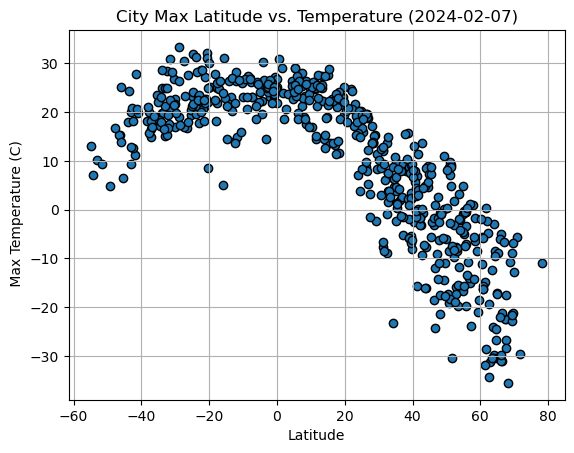

In [9]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
city_date_timestamp = time.strftime("%Y-%m-%d", time.gmtime(city_date))
plt.scatter(x_axis,y_axis, edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({city_date_timestamp})")
plt.xlabel('Latitude')
plt.ylabel(f" Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

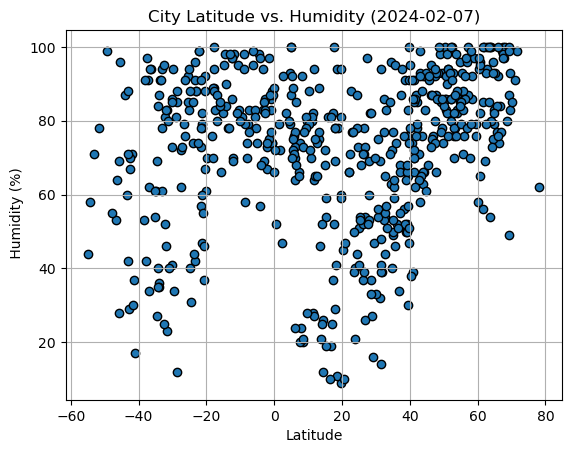

In [10]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, edgecolor = 'black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({city_date_timestamp})")
plt.xlabel('Latitude')
plt.ylabel(f" Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

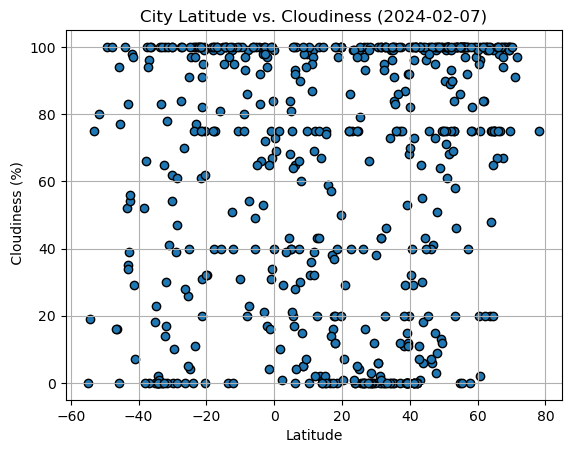

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, edgecolor = 'black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({city_date_timestamp})")
plt.xlabel('Latitude')
plt.ylabel(f" Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

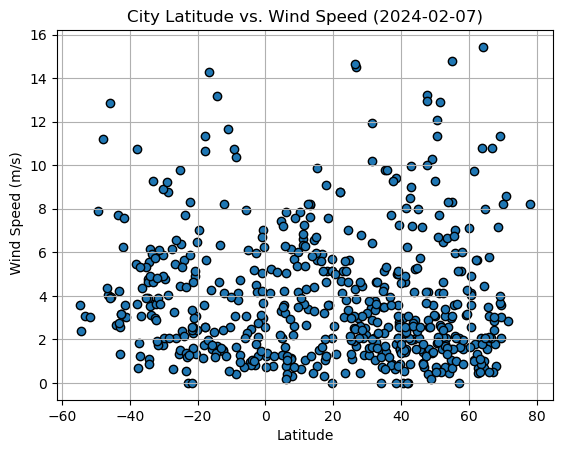

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, edgecolor = 'black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({city_date_timestamp})")
plt.xlabel('Latitude')
plt.ylabel(f" Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
import scipy.stats as st
def linear_regression_plot(x_values, y_values, xlabel, ylabel, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    x_annotate = min(x_values)
    y_annotate = min(y_values)
    plt.annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The r-value is {round(correlation[0],2)}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,-24.00,54,20,2.06,CA,1707273297
2,isafjordur,66.0755,-23.1240,-5.09,92,100,5.80,IS,1707273297
3,tura,25.5198,90.2201,15.98,68,0,1.12,IN,1707273297
4,el bauga,18.2620,33.9081,11.54,41,100,5.15,SD,1707273297
5,bayanhongor,46.7167,100.1167,-24.38,76,41,0.75,MN,1707273298


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.92,62,96,1.23,SH,1707273296
9,adamstown,-25.0660,-130.1015,23.37,83,91,4.43,PN,1707272992
10,port elizabeth,-33.9180,25.5701,19.87,87,0,6.17,ZA,1707273005
11,port-aux-francais,-49.3500,70.2167,4.91,99,100,7.88,TF,1707273300
18,saint-philippe,-21.3585,55.7679,21.92,82,91,2.29,RE,1707273301


The r-value is -0.88


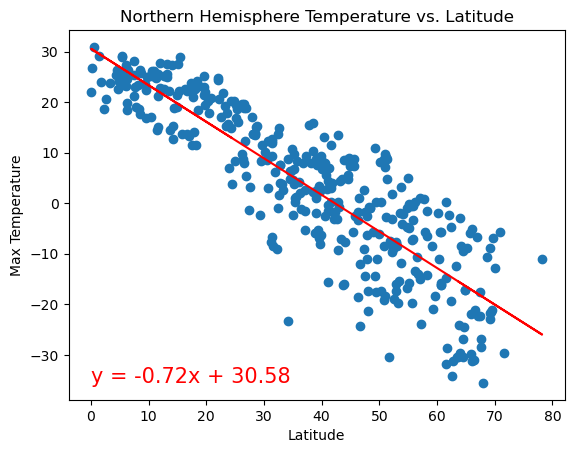

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Max Temp']
linear_regression_plot(x_values,y_values,xlabel='Latitude',ylabel='Max Temperature', title = 'Northern Hemisphere Temperature vs. Latitude')

###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.47


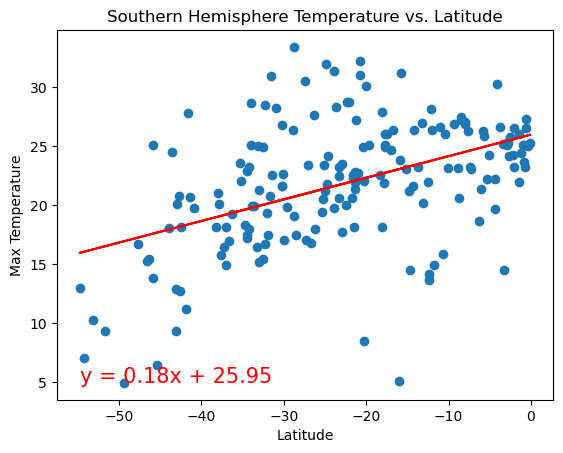

In [17]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Max Temp']
linear_regression_plot(x_values,y_values,xlabel='Latitude',ylabel='Max Temperature', title = 'Southern Hemisphere Temperature vs. Latitude')

**Discussion about the linear relationship:** The northern hemisphere temperature vs. latitude is negatively correlated while the southern hemisphere temperature vs. latitude is positively correlated. The northern hemisphere plot has a stronger correlation as the value is closer to -1 than the southern hemisphere is close to 1.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.44


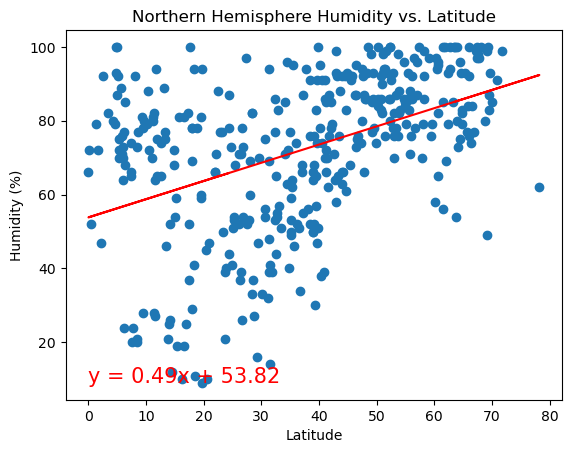

In [18]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Humidity']
linear_regression_plot(x_values,y_values,xlabel='Latitude',ylabel=f"Humidity (%)", title = 'Northern Hemisphere Humidity vs. Latitude')

The r-value is 0.38


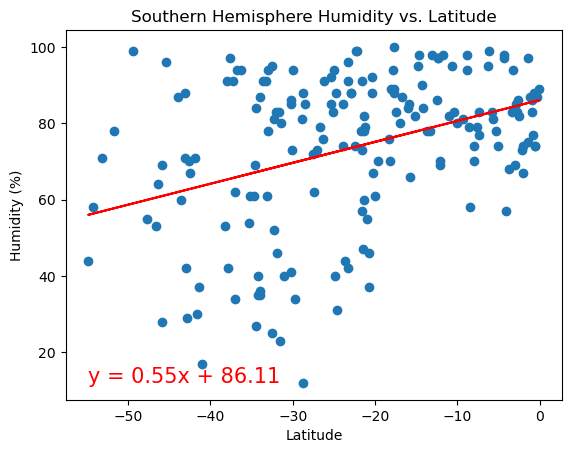

In [19]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Humidity']
linear_regression_plot(x_values,y_values,xlabel='Latitude',ylabel=f"Humidity (%)", title = 'Southern Hemisphere Humidity vs. Latitude')

**Discussion about the linear relationship:** The northern hemisphere data has a stronger positive correlation thant the southern hemisphere data for humidity vs. latitude. However, both hemisphere variables have low correlation values as both reside between 0.5 and 0.0.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.32


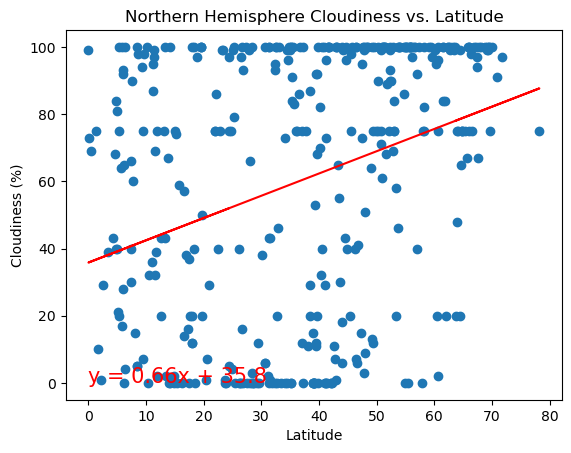

In [20]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Cloudiness']
linear_regression_plot(x_values,y_values,xlabel='Latitude',ylabel=f"Cloudiness (%)", title = 'Northern Hemisphere Cloudiness vs. Latitude')

The r-value is 0.25


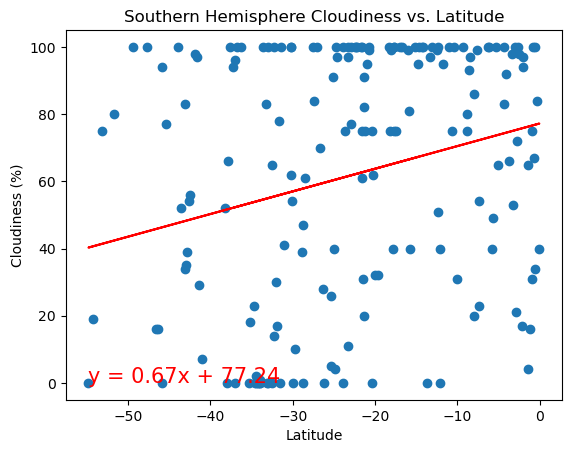

In [21]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Cloudiness']
linear_regression_plot(x_values,y_values,xlabel='Latitude',ylabel=f"Cloudiness (%)", title = 'Southern Hemisphere Cloudiness vs. Latitude')

**Discussion about the linear relationship:** The nothern hemisphere data has a stronger positive correlation compared to the southern hemisphere data for cloudiness vs. latitude. Like the humidity vs latitude linear regressions, the latitude vs cloudiness (%) is has low correlation values.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.0


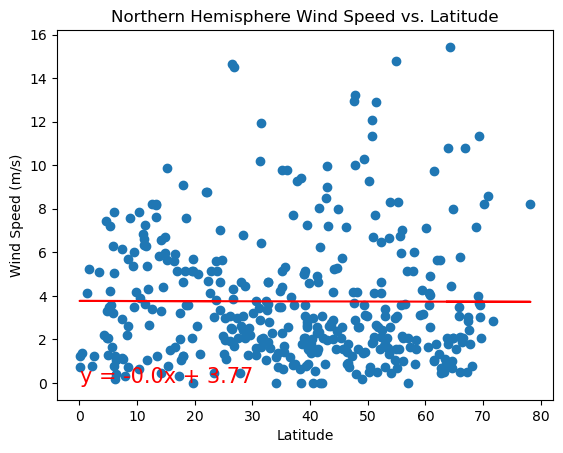

In [22]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Wind Speed']
linear_regression_plot(x_values,y_values,xlabel='Latitude',ylabel=f"Wind Speed (m/s)", title = 'Northern Hemisphere Wind Speed vs. Latitude')

The r-value is -0.12


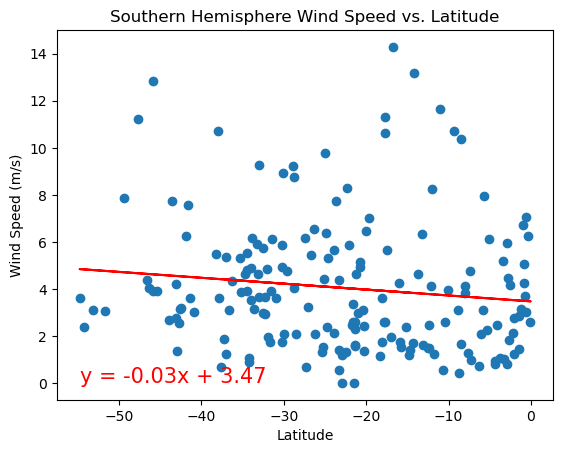

In [23]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Wind Speed']
linear_regression_plot(x_values,y_values,xlabel='Latitude',ylabel=f"Wind Speed (m/s)", title = 'Southern Hemisphere Wind Speed vs. Latitude')

**Discussion about the linear relationship:** Both the northern hemisphere and southern hemisphere linear regression's are negatively correlated. Both sets of data for the hemisphere's for the wind speed vs. latitude have low correlation values as the values are betweem 0.0 to -0.2.